In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# sys.path.insert(0,'..')
# from notebookFunctions import *
# from .. import notebookFunctions
from Bio.PDB.Polypeptide import one_to_three
from Bio.PDB.Polypeptide import three_to_one
from Bio.PDB.PDBParser import PDBParser
from pyCodeLib import *
from small_script.myFunctions import *
from collections import defaultdict
%matplotlib inline
# plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams['figure.figsize'] = np.array([16.18033, 10])    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 22})

In [3]:
dataset = {}
dataset["optimization"] = ['1e0m', '1w4e', '1e0g', '2wqg', '1jo8', '1fex', '2l6r', '1c8c', '1g6p', '1mjc', '2jmc', '1hdn', '1st7', '1n88', '1d6o', '1hcd', '2ga5', '1j5u', '3o4d', '1k0s']
dataset["optimization_cath"] = ['1a75A00', '1bekA01', '1bqbA02', '1cpcB00', '1cscA02', '1cy5A00', '1dv5A00', '1e8yA05', '1evyA02', '1in4A03', '1l1fA03', '1vq8P01', '1xmkA00', '1zcaA02', '2grhA00', '2ii2A04', '2q6fB03', '2wh6A00', '3g0vA00', '3geuA00', '3h99A03', '3hrdD02', '3ju5A01', '3p1wA03', '4cxfA01', '4i2aA01', '4i4tB03', '4i6uB00', '5kn9A02']


In [165]:
pdb_list = dataset["optimization_cath"]
simulationType = "optimization_database"
run_n = 5
folder_list = ["iter0_gpu"]
all_data = []

for folder in folder_list:
    for pdb in pdb_list:
        for i in range(run_n):
                pre = f"/Users/weilu/Research/server/dec_2019/{simulationType}/{folder}/{pdb}/{i}"
                info_file = "info.dat"
                location = f"{pre}/{info_file}"
                try:
                    tmp = pd.read_csv(location, sep="\s+")
                    tmp = tmp.assign(Run=i, Protein=pdb, Folder=folder)
                    all_data.append(tmp)
                except:
                    print(pdb, i, folder)
                    pass
data = pd.concat(all_data)
today = datetime.today().strftime('%m-%d')
outFile = f"/Users/weilu/Research/data/openMM/{simulationType}_{folder}_{today}.csv"
data.reset_index(drop=True).to_csv(outFile)
print(outFile)


/Users/weilu/Research/data/openMM/optimization_database_iter0_gpu_12-29.csv


In [167]:
data = pd.read_csv("/Users/weilu/Research/data/openMM/optimization_database_iter0_gpu_12-29.csv", index_col=0)
sub_pdb_list = pdb_list
data.Protein = pd.Categorical(data.Protein, 
                      categories=sub_pdb_list)

In [170]:
max_Q_data

,Steps,Q,Rg,Backbone,Rama,Contact,Fragment,Membrane,ER,TBM_Q,Beta,Pap,Helical,Total,Run,Protein,Folder
0,366,0.56,11.60,408.51,-574.28,-220.53,-202.01,0.0,0.0,0.0,-24.93,-0.00,0.0,-613.24,0,1a75A00,iter0_gpu
1,478,0.30,15.25,533.60,-758.93,-330.51,-274.89,0.0,0.0,0.0,-27.71,-1.52,0.0,-859.96,0,1bekA01,iter0_gpu
2,271,0.39,14.98,584.51,-793.09,-181.79,-237.88,0.0,0.0,0.0,-30.24,-0.02,0.0,-658.51,4,1bqbA02,iter0_gpu
3,497,0.41,15.49,556.91,-1226.64,-328.39,-345.68,0.0,0.0,0.0,-59.33,-0.00,0.0,-1403.12,2,1cpcB00,iter0_gpu
4,447,0.46,13.25,369.69,-675.83,-179.42,-183.97,0.0,0.0,0.0,-24.79,-0.00,0.0,-694.33,2,1cscA02,iter0_gpu
5,336,0.69,11.34,361.05,-668.22,-163.57,-194.35,0.0,0.0,0.0,-25.60,-0.00,0.0,-690.68,4,1cy5A00,iter0_gpu
6,478,0.59,10.54,231.20,-352.70,-150.07,-142.83,0.0,0.0,0.0,-19.35,-0.00,0.0,-433.75,0,1dv5A00,iter0_gpu
7,181,0.36,17.51,892.96,-1120.93,-340.00,-323.41,0.0,0.0,0.0,-44.09,-1.14,0.0,-936.62,2,1e8yA05,iter0_gpu
8,407,0.40,13.83,512.47,-855.85,-307.81,-259.17,0.0,0.0,0.0,-40.74,-0.21,0.0,-951.30,4,1evyA02,iter0_gpu
9,484,0.82,10.89,221.51,-556.43,-119.58,-171.95,0.0,0.0,0.0,-28.40,-0.01,0.0,-654.85,3,1in4A03,iter0_gpu


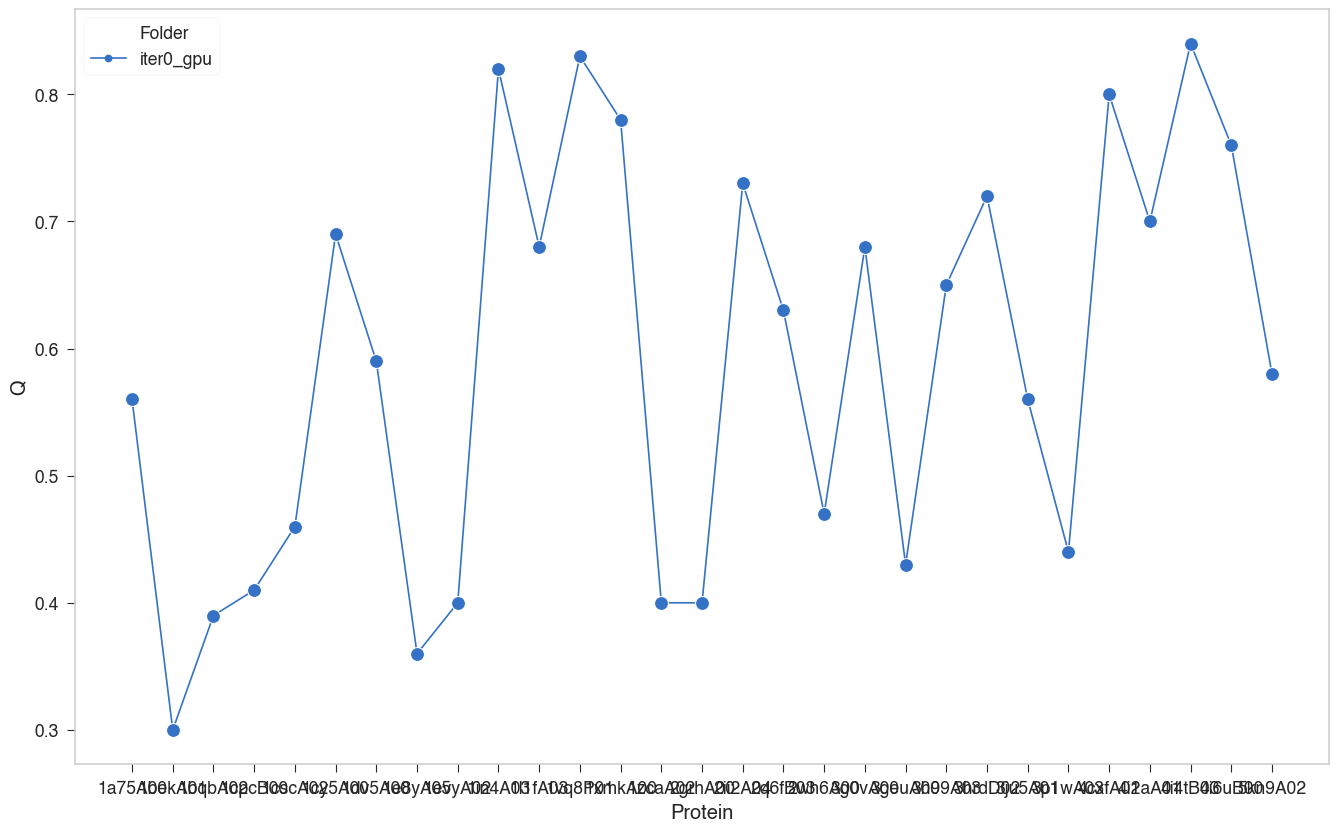

In [169]:
y = "Q"
# d = data.query("Steps > 1500").reset_index(drop=True)
# d = data.query("Folder!='iter2_gpu' and Folder != 'first_cpu2'").reset_index(drop=True)
# d = data.query("Folder=='iter0_gpu_less_beta' or Folder == 'iter4_gpu'").reset_index(drop=True)
d = data
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
# sub_data = max_Q_data.query("Scheme in ['hybrid contact', 'contact as in water', 'contact as in membrane']")
# sub_data = max_Q_mem_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


In [153]:
d = pd.read_csv("/Users/weilu/Research/server/dec_2019/iterative_optimization/original_pdbs/first_test_set.csv", index_col=0)
d = d.sort_values("Lpdb").reset_index(drop=True)
pdb_list = d.PDB.str.lower().to_list()

In [192]:
pdb_list = dataset["optimization"]
simulationType = "iterative_optimization"
# folder = "original"
# folder = "first"
# folder = "second_withoutExclusion"
# folder_list = ["first", "second_withoutExclusion"]
# "first", 
folder_list = ["iter7_gpu_long", "iter7_gpu", "iter6_gpu", "iter5_gpu", "iter5_withBiased_gpu", "iter0_gpu_less_beta", "iter4_gpu", "first_cpu2", "first_iter1_cpu4", "first_gpu", "iter2_gpu", "iter2_real_gpu", "iter3_gpu"]
all_data = []
for folder in folder_list:
    for pdb in pdb_list:
        for i in range(10):
                pre = f"/Users/weilu/Research/server/dec_2019/{simulationType}/{folder}/{pdb}/{i}"
                info_file = "info.dat"
                location = f"{pre}/{info_file}"
                try:
                    tmp = pd.read_csv(location, sep="\s+")
                    tmp = tmp.assign(Run=i, Protein=pdb, Folder=folder)
                    all_data.append(tmp)
                except:
                    print(pdb, i, folder)
                    pass
data = pd.concat(all_data)
today = datetime.today().strftime('%m-%d')
outFile = f"/Users/weilu/Research/data/openMM/{simulationType}_{folder}_{today}.csv"
data.reset_index(drop=True).to_csv(outFile)
print(outFile)

/Users/weilu/Research/data/openMM/iterative_optimization_iter3_gpu_01-03.csv


In [4]:
data = pd.read_csv("/Users/weilu/Research/data/openMM/iterative_optimization_iter3_gpu_01-03.csv", index_col=0)

/Users/weilu/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [194]:
sub_pdb_list = pdb_list
data.Protein = pd.Categorical(data.Protein, 
                      categories=sub_pdb_list)

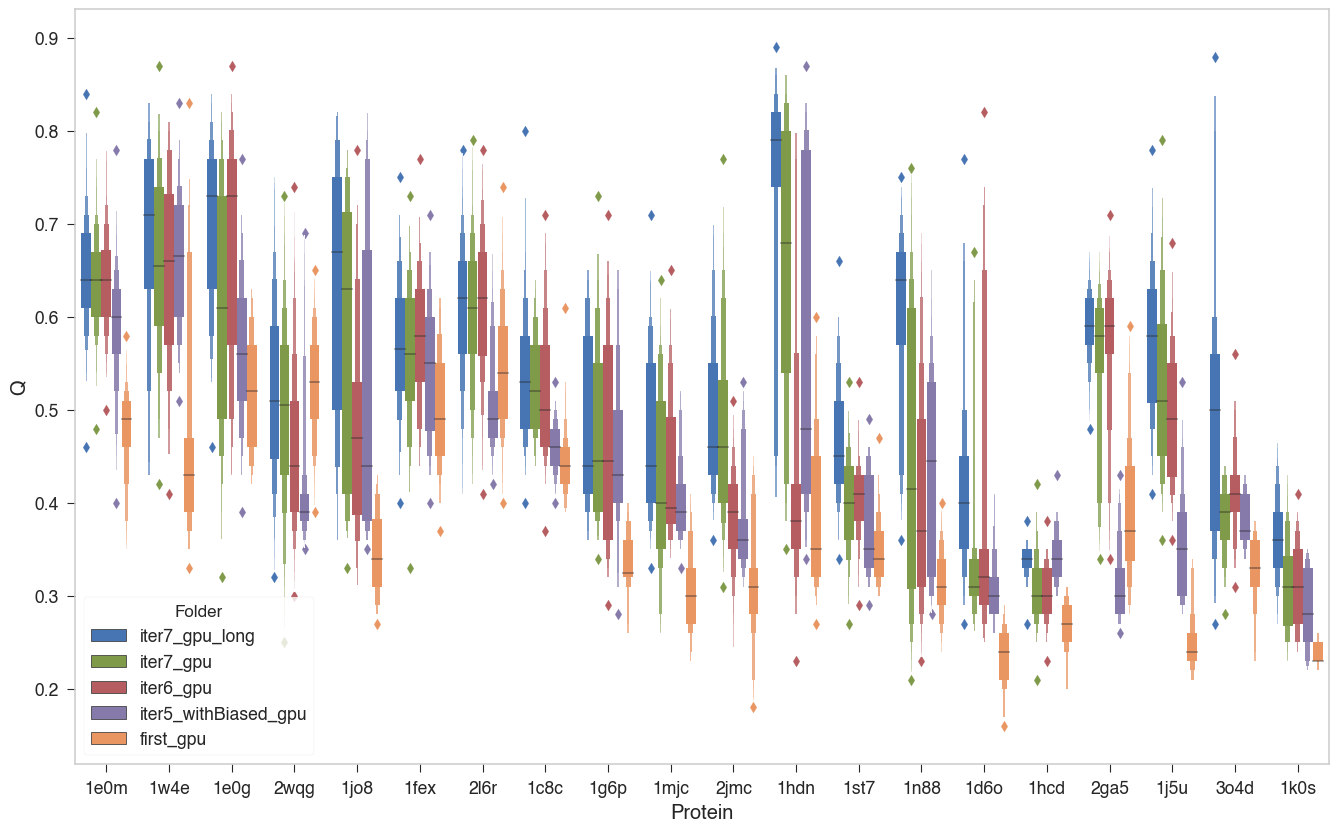

In [196]:
y = "Q"
# d = data.query("Steps > 1500").reset_index(drop=True)
# d = data.query("Folder!='iter2_gpu' and Folder != 'first_cpu2'").reset_index(drop=True)
d = data.query("Folder == 'iter7_gpu_long' or Folder == 'iter5_withBiased_gpu' or Folder == 'first_gpu' or Folder == 'iter6_gpu' or Folder == 'iter7_gpu'").reset_index(drop=True)
#
t = d.groupby(["Protein", "Run", "Folder"]).tail(20)
ax = sns.boxenplot(x="Protein", y=y, hue="Folder", data=t)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


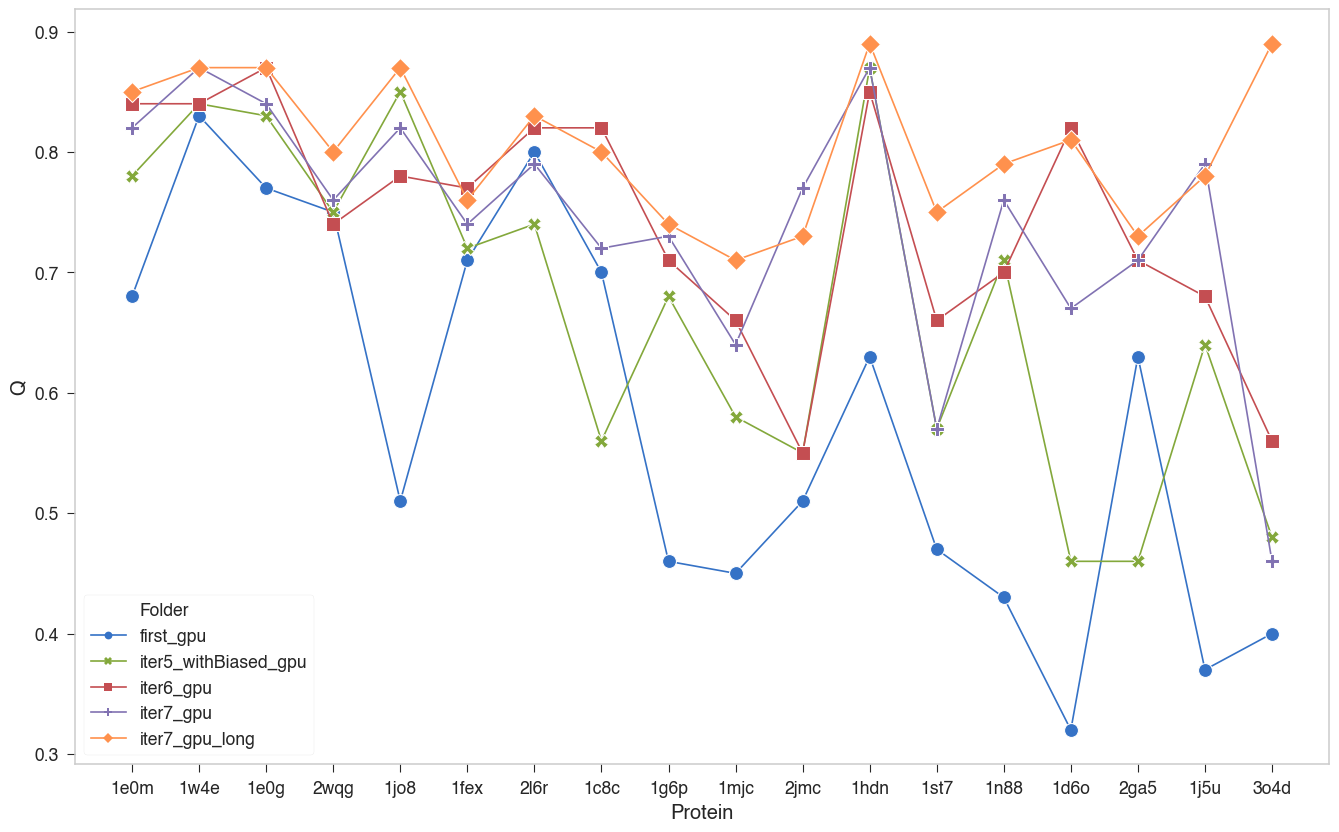

In [5]:
y = "Q"
# d = data.query("Steps > 1500").reset_index(drop=True)
# d = data.query("Folder!='iter2_gpu' and Folder != 'first_cpu2'").reset_index(drop=True)
# d = data.query("Folder=='iter0_gpu_less_beta' or Folder == 'iter4_gpu'").reset_index(drop=True)
d = data.query("Folder == 'iter7_gpu_long' or Folder == 'iter5_withBiased_gpu' or Folder == 'first_gpu' or Folder == 'iter6_gpu' or Folder == 'iter7_gpu'").reset_index(drop=True)
# d = data
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
sub_data = max_Q_data.query("Protein != '1hcd'").reset_index(drop=True)
# sub_data = max_Q_data.query("Scheme in ['hybrid contact', 'contact as in water', 'contact as in membrane']")
# sub_data = max_Q_mem_data
dataset["optimization_v2"] = ['1e0m', '1w4e', '1e0g', '2wqg', '1jo8', '1fex', '2l6r', '1c8c', '1g6p', '1mjc', '2jmc', '1hdn', '1st7', '1n88', '1d6o', '2ga5', '1j5u', '3o4d']

sub_data.Protein = pd.Categorical(sub_data.Protein, 
                      categories=dataset["optimization_v2"])
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


In [ ]:
sub_data

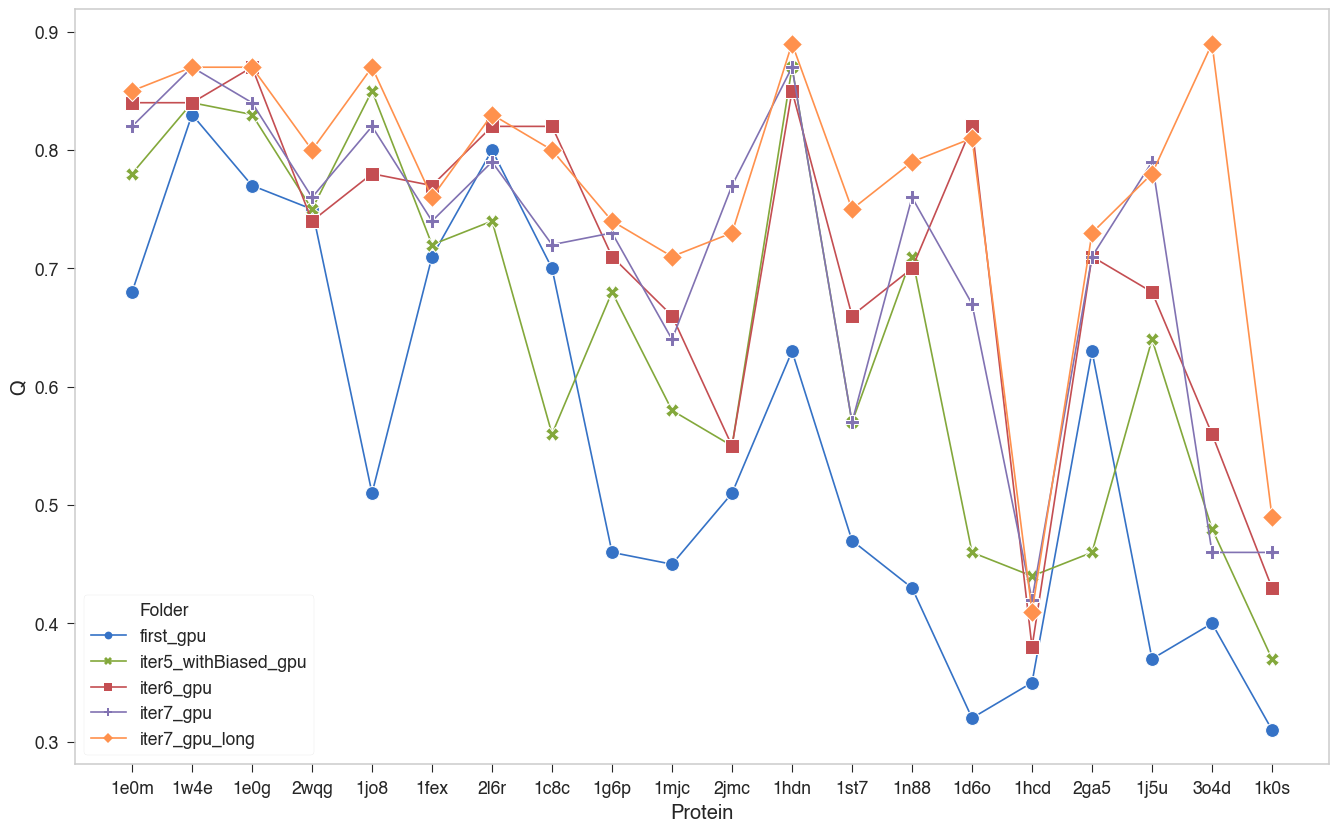

In [195]:
y = "Q"
# d = data.query("Steps > 1500").reset_index(drop=True)
# d = data.query("Folder!='iter2_gpu' and Folder != 'first_cpu2'").reset_index(drop=True)
# d = data.query("Folder=='iter0_gpu_less_beta' or Folder == 'iter4_gpu'").reset_index(drop=True)
d = data.query("Folder == 'iter7_gpu_long' or Folder == 'iter5_withBiased_gpu' or Folder == 'first_gpu' or Folder == 'iter6_gpu' or Folder == 'iter7_gpu'").reset_index(drop=True)
# d = data
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
# sub_data = max_Q_data.query("Scheme in ['hybrid contact', 'contact as in water', 'contact as in membrane']")
# sub_data = max_Q_mem_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


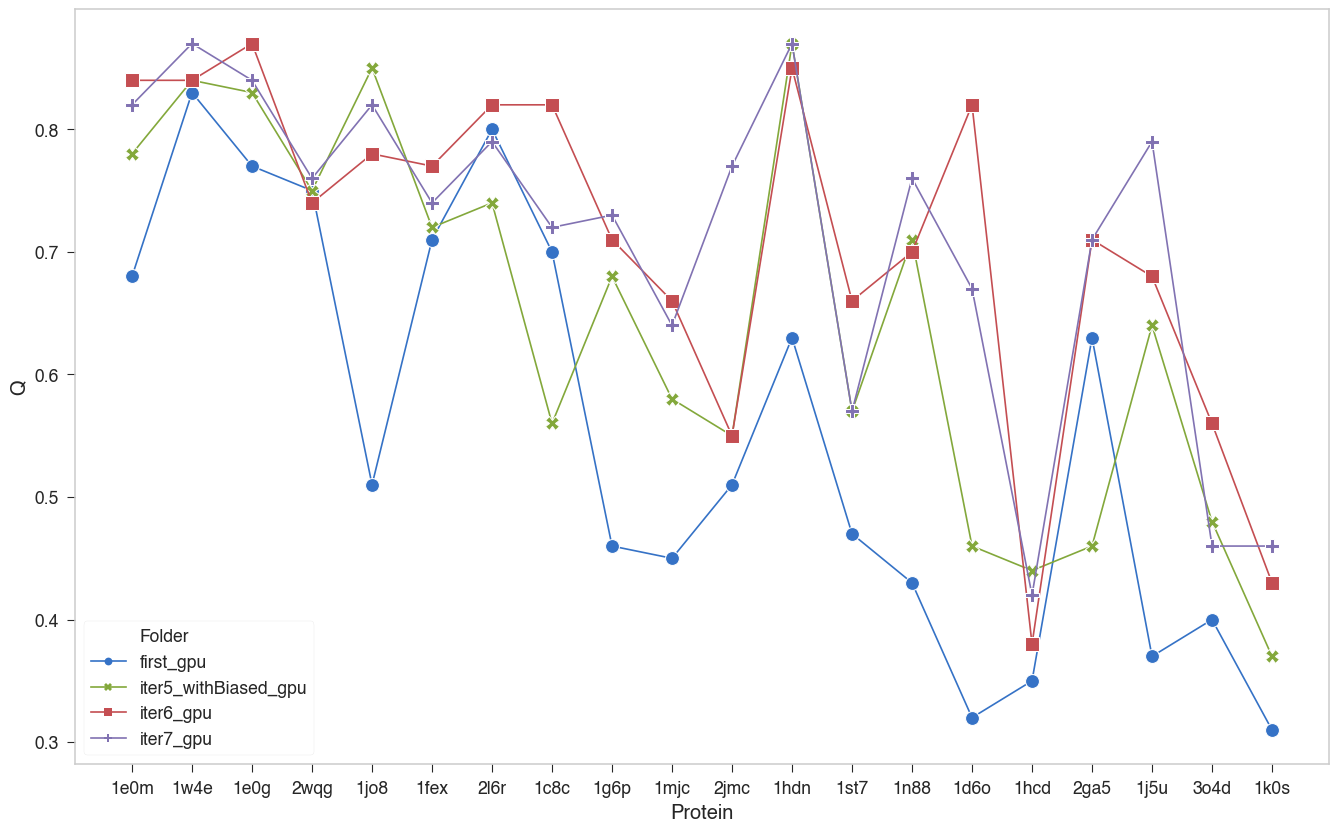

In [191]:
y = "Q"
# d = data.query("Steps > 1500").reset_index(drop=True)
# d = data.query("Folder!='iter2_gpu' and Folder != 'first_cpu2'").reset_index(drop=True)
# d = data.query("Folder=='iter0_gpu_less_beta' or Folder == 'iter4_gpu'").reset_index(drop=True)
d = data.query("Folder == 'iter5_withBiased_gpu' or Folder == 'first_gpu' or Folder == 'iter6_gpu' or Folder == 'iter7_gpu'").reset_index(drop=True)
# d = data
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
# sub_data = max_Q_data.query("Scheme in ['hybrid contact', 'contact as in water', 'contact as in membrane']")
# sub_data = max_Q_mem_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


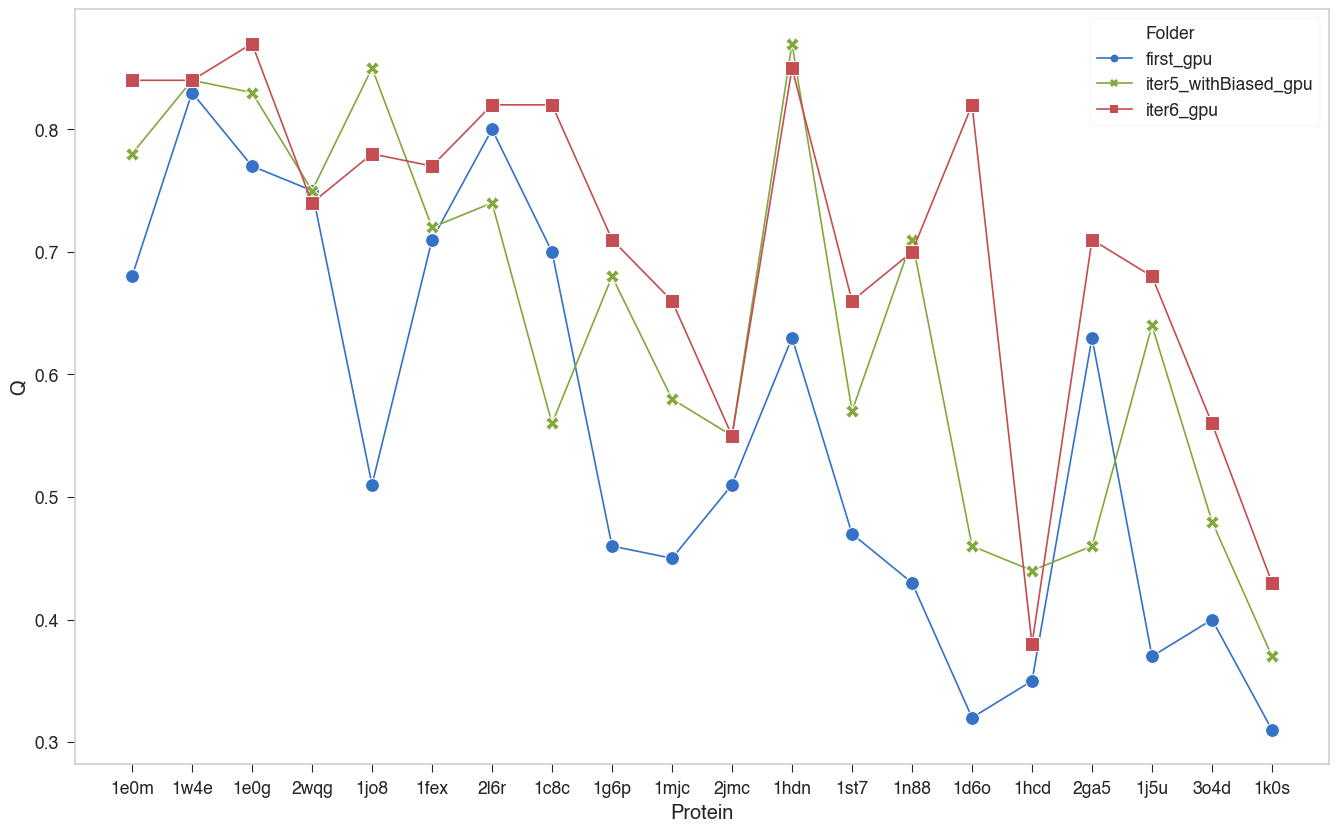

In [185]:
y = "Q"
# d = data.query("Steps > 1500").reset_index(drop=True)
# d = data.query("Folder!='iter2_gpu' and Folder != 'first_cpu2'").reset_index(drop=True)
# d = data.query("Folder=='iter0_gpu_less_beta' or Folder == 'iter4_gpu'").reset_index(drop=True)
d = data.query("Folder == 'iter5_withBiased_gpu' or Folder == 'first_gpu' or Folder == 'iter6_gpu'").reset_index(drop=True)
# d = data
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
# sub_data = max_Q_data.query("Scheme in ['hybrid contact', 'contact as in water', 'contact as in membrane']")
# sub_data = max_Q_mem_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


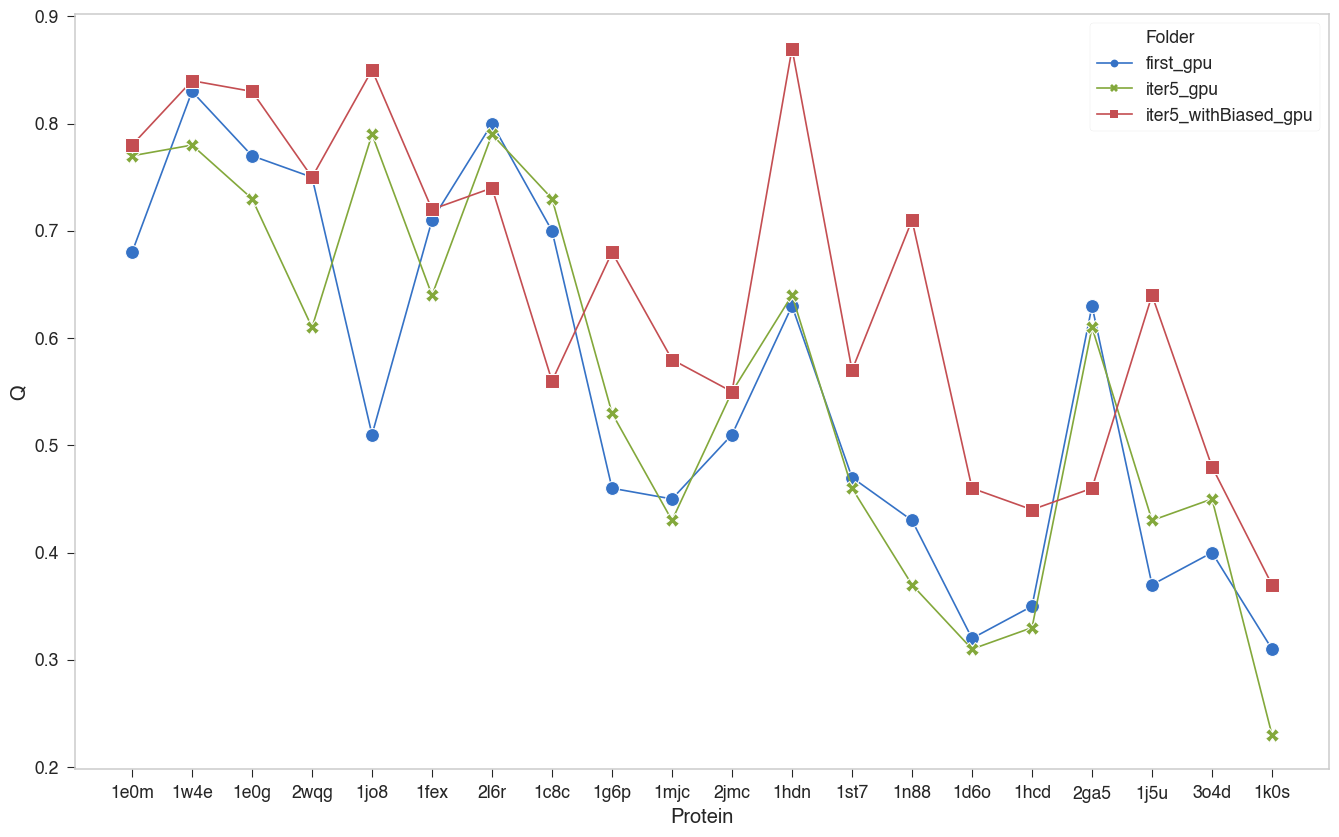

In [184]:
y = "Q"
# d = data.query("Steps > 1500").reset_index(drop=True)
# d = data.query("Folder!='iter2_gpu' and Folder != 'first_cpu2'").reset_index(drop=True)
# d = data.query("Folder=='iter0_gpu_less_beta' or Folder == 'iter4_gpu'").reset_index(drop=True)
d = data.query("Folder=='iter5_gpu' or Folder == 'iter5_withBiased_gpu' or Folder == 'first_gpu'").reset_index(drop=True)
# d = data
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
# sub_data = max_Q_data.query("Scheme in ['hybrid contact', 'contact as in water', 'contact as in membrane']")
# sub_data = max_Q_mem_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


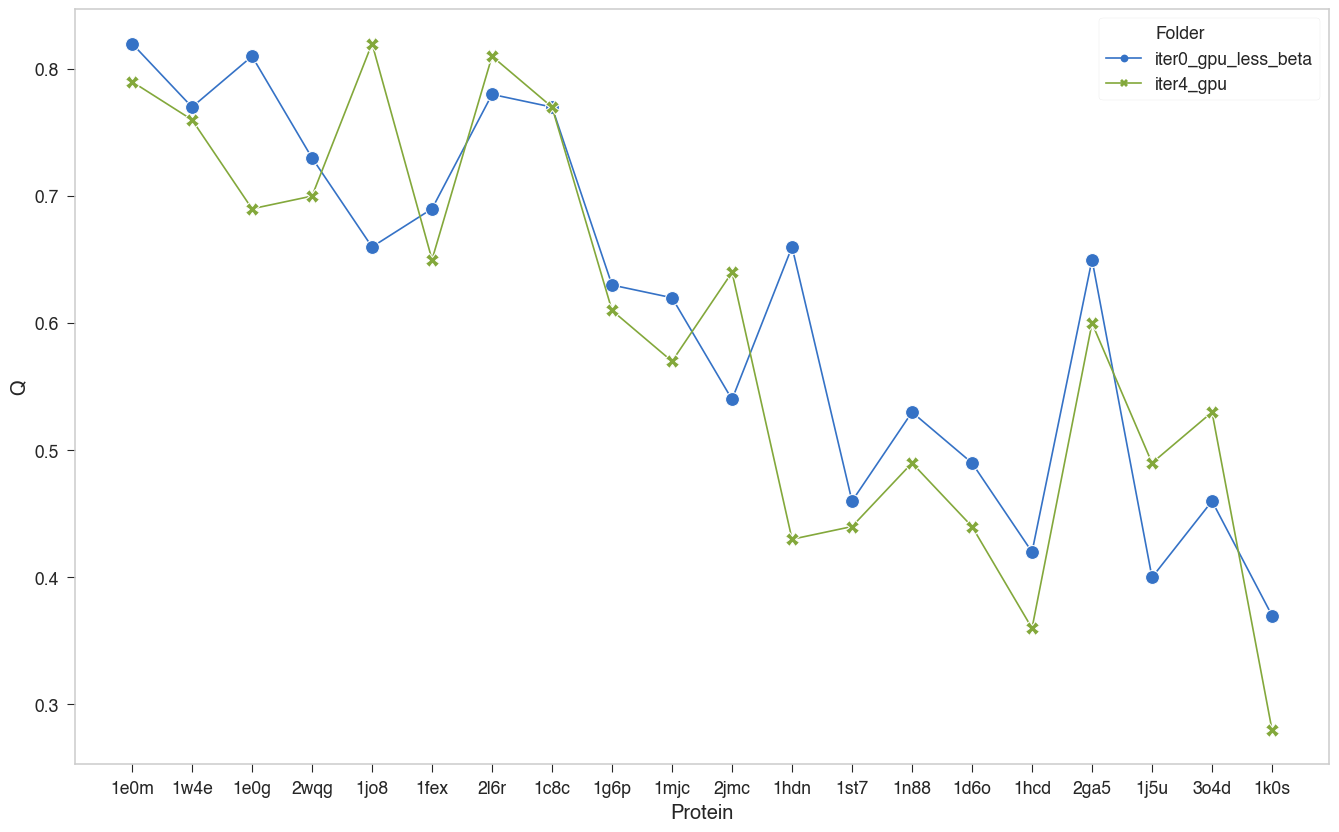

In [160]:
y = "Q"
# d = data.query("Steps > 1500").reset_index(drop=True)
# d = data.query("Folder!='iter2_gpu' and Folder != 'first_cpu2'").reset_index(drop=True)
d = data.query("Folder=='iter0_gpu_less_beta' or Folder == 'iter4_gpu'").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
# sub_data = max_Q_data.query("Scheme in ['hybrid contact', 'contact as in water', 'contact as in membrane']")
# sub_data = max_Q_mem_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


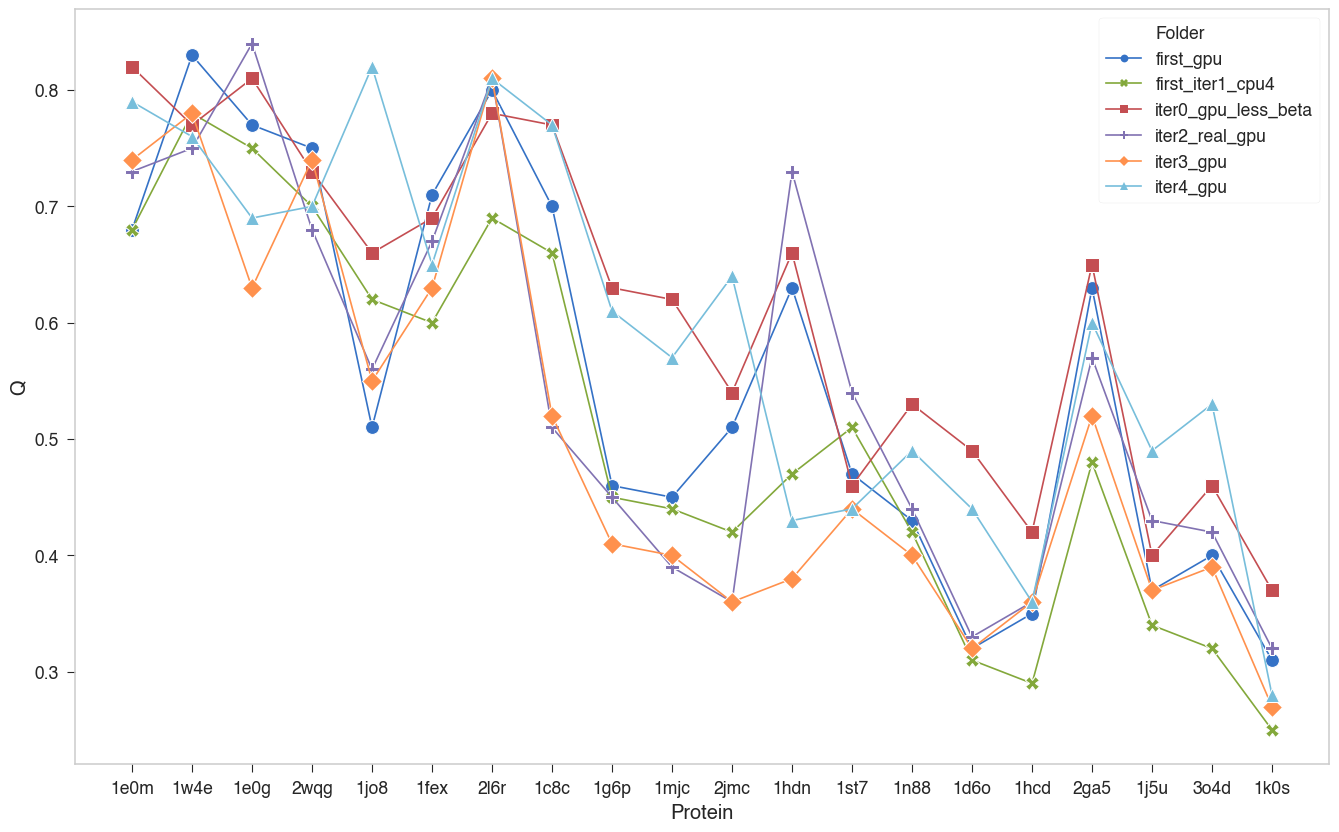

In [161]:
y = "Q"
# d = data.query("Steps > 1500").reset_index(drop=True)
d = data.query("Folder!='iter2_gpu' and Folder != 'first_cpu2'").reset_index(drop=True)
# d = data.query("Folder=='iter0_gpu_less_beta' or Folder == 'iter4_gpu'").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
# sub_data = max_Q_data.query("Scheme in ['hybrid contact', 'contact as in water', 'contact as in membrane']")
# sub_data = max_Q_mem_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


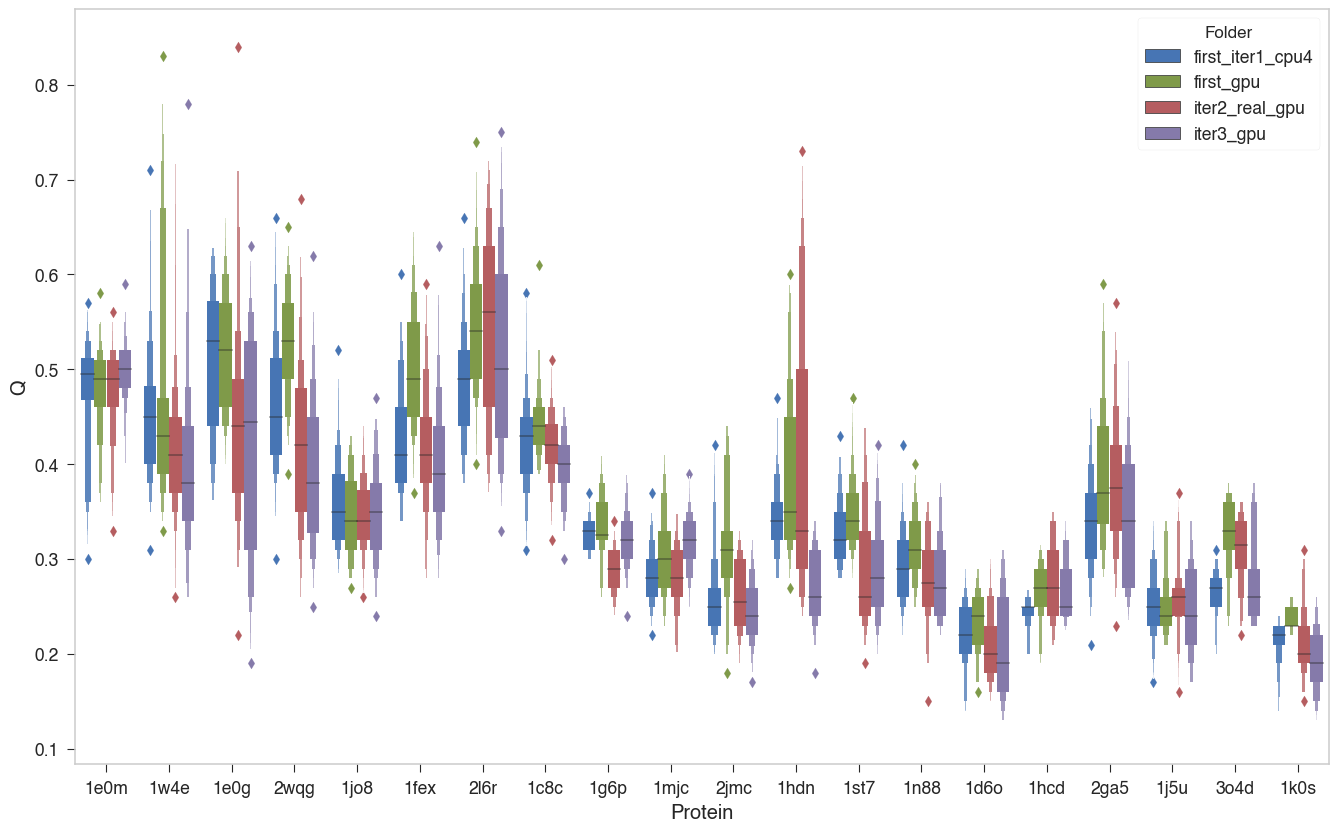

In [149]:
y = "Q"
# d = data.query("Steps > 1500").reset_index(drop=True)
d = data.query("Folder!='iter2_gpu' and Folder != 'first_cpu2'").reset_index(drop=True)
t = d.groupby(["Protein", "Run", "Folder"]).tail(20)
ax = sns.boxenplot(x="Protein", y=y, hue="Folder", data=t)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


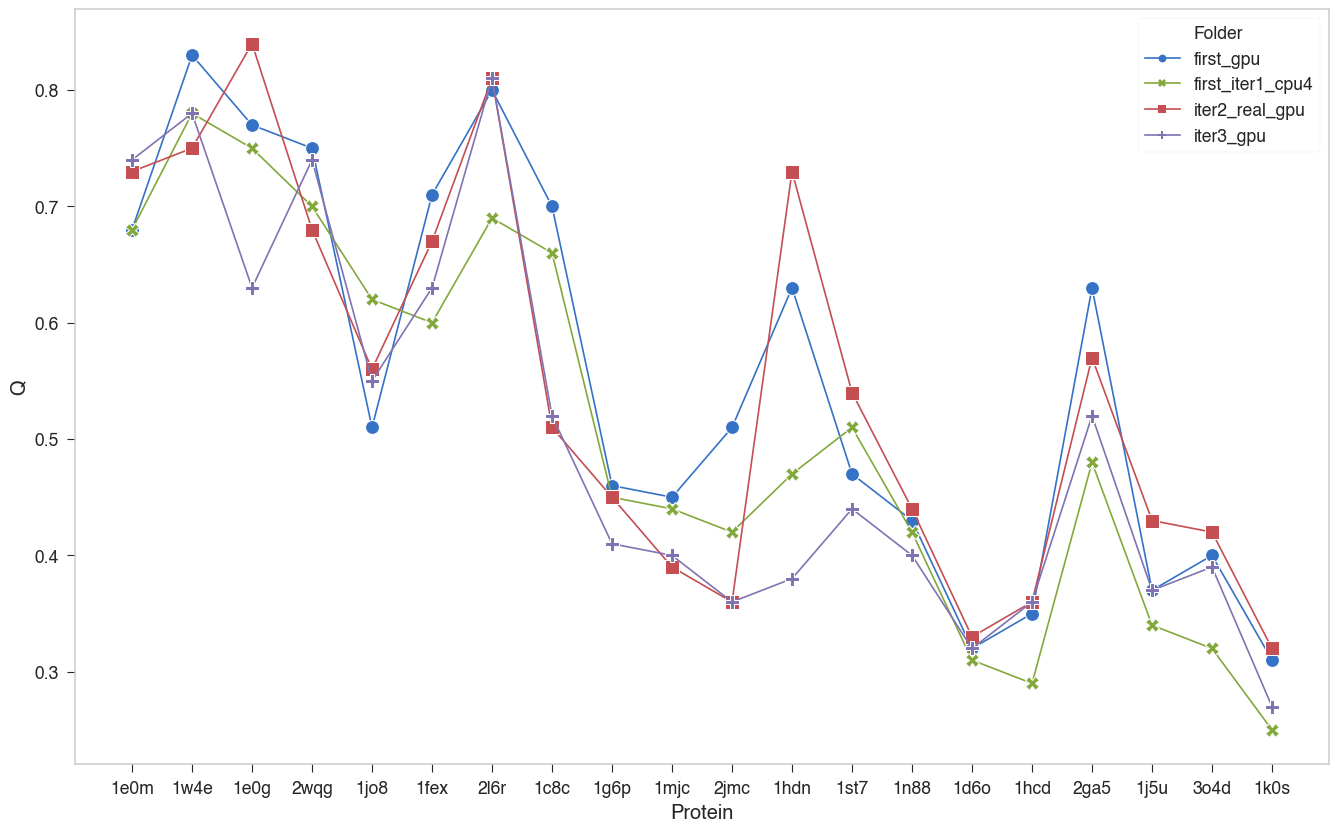

In [144]:
y = "Q"
# d = data.query("Steps > 1500").reset_index(drop=True)
d = data.query("Folder!='iter2_gpu' and Folder != 'first_cpu2'").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
# sub_data = max_Q_data.query("Scheme in ['hybrid contact', 'contact as in water', 'contact as in membrane']")
# sub_data = max_Q_mem_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


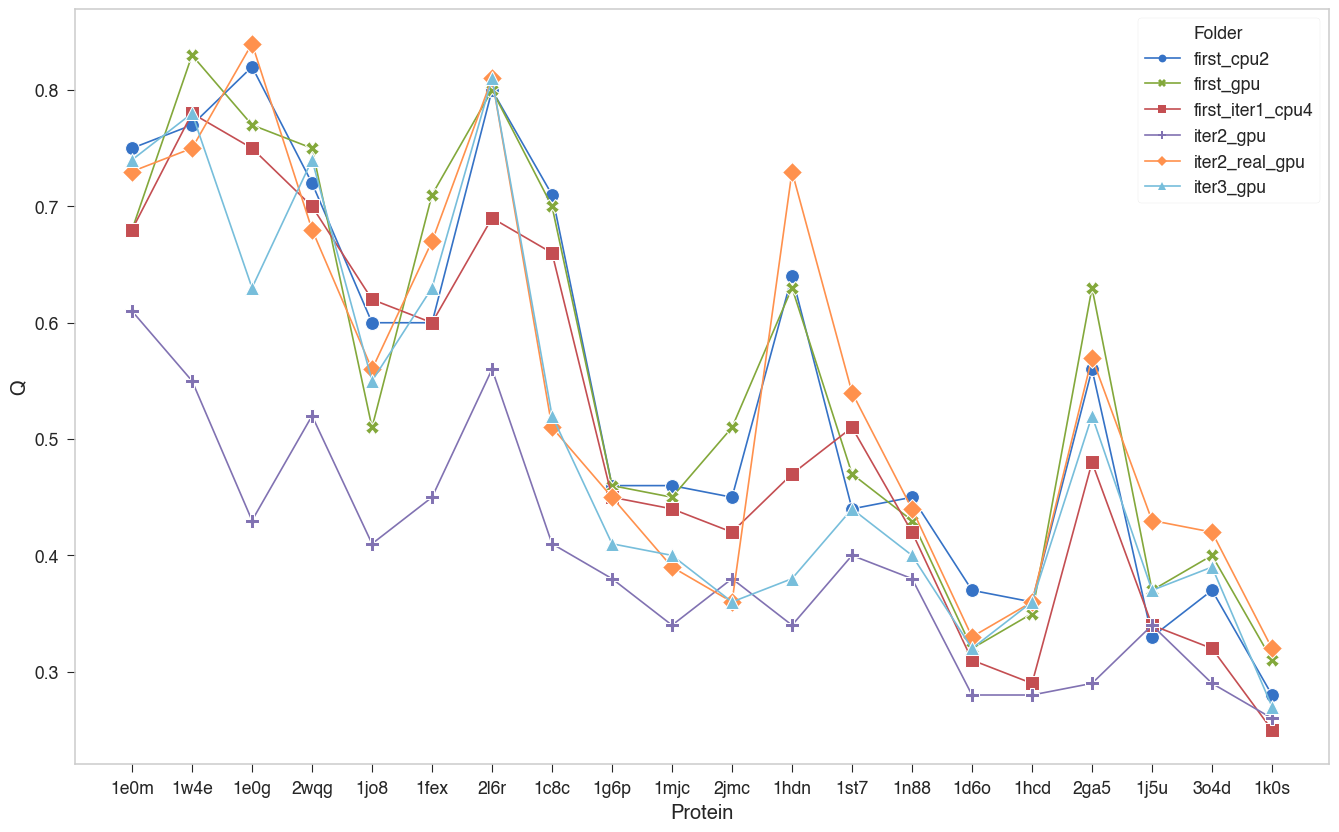

In [140]:
y = "Q"
# d = data.query("Steps > 1500").reset_index(drop=True)
d = data.query("Folder != 'iter2_gpu'")
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
# sub_data = max_Q_data.query("Scheme in ['hybrid contact', 'contact as in water', 'contact as in membrane']")
# sub_data = max_Q_mem_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


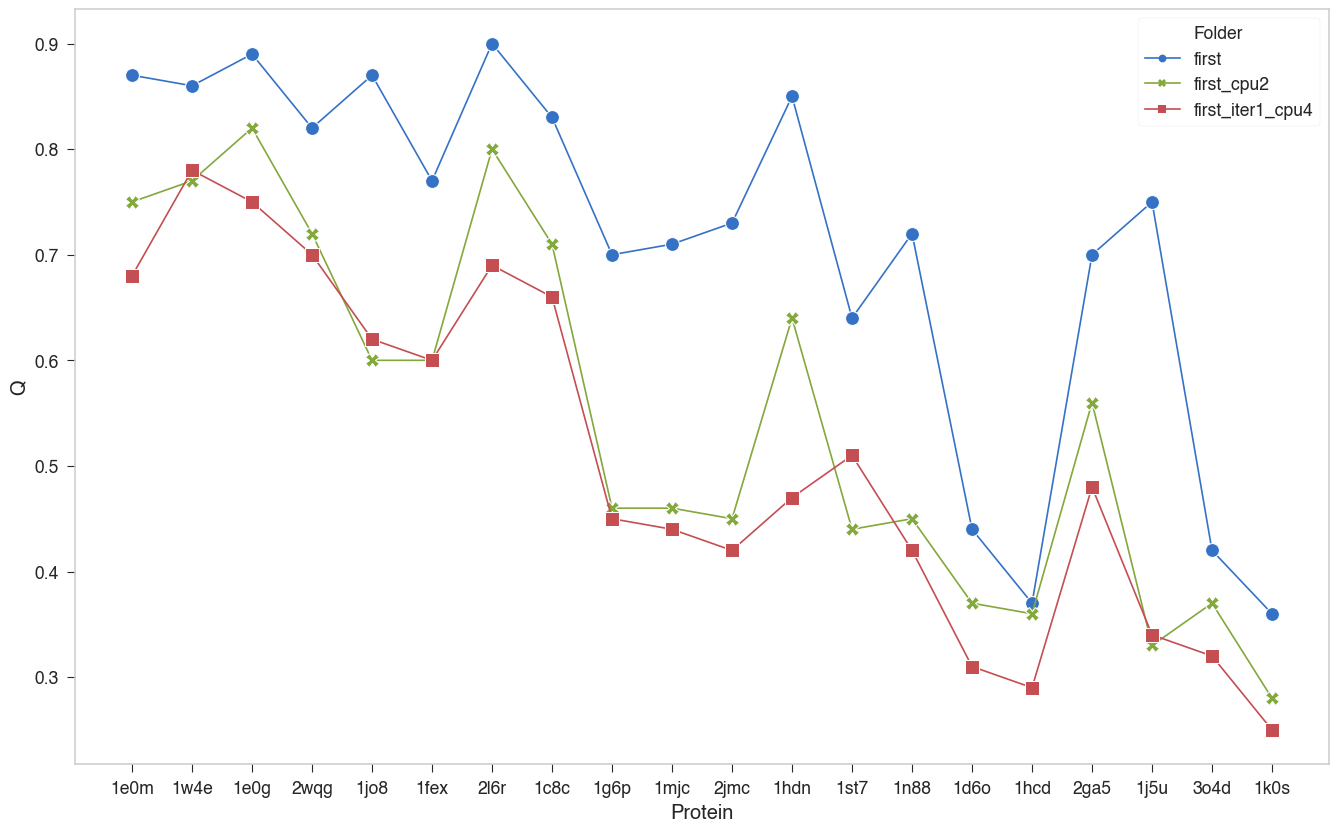

In [121]:
y = "Q"
# d = data.query("Steps > 1500").reset_index(drop=True)
d = data
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
# sub_data = max_Q_data.query("Scheme in ['hybrid contact', 'contact as in water', 'contact as in membrane']")
# sub_data = max_Q_mem_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


In [ ]:
y = "Steps"
# d = data.query("Steps > 1500").reset_index(drop=True)
d = data
t = d.groupby(["Protein", "Folder", "Run"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
# sub_data = max_Q_data.query("Scheme in ['hybrid contact', 'contact as in water', 'contact as in membrane']")
# sub_data = max_Q_mem_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


# CPU, thread 1

In [ ]:
data = pd.read_csv("/Users/weilu/Research/data/openMM/iterative_optimization_first_12-14.csv", index_col=0)
sub_pdb_list = pdb_list
data.Protein = pd.Categorical(data.Protein, 
                      categories=sub_pdb_list)

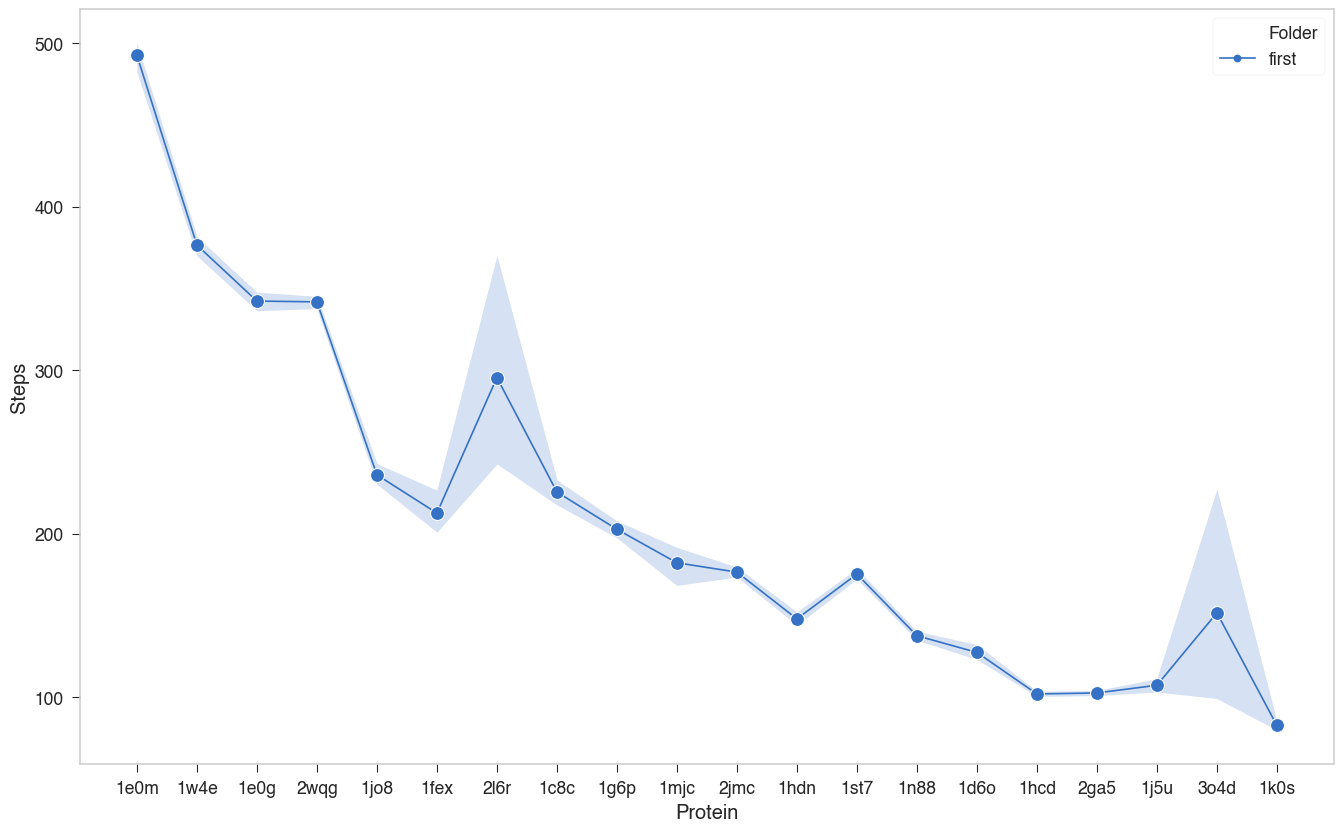

In [24]:
y = "Steps"
# d = data.query("Steps > 1500").reset_index(drop=True)
d = data
t = d.groupby(["Protein", "Folder", "Run"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
# sub_data = max_Q_data.query("Scheme in ['hybrid contact', 'contact as in water', 'contact as in membrane']")
# sub_data = max_Q_mem_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


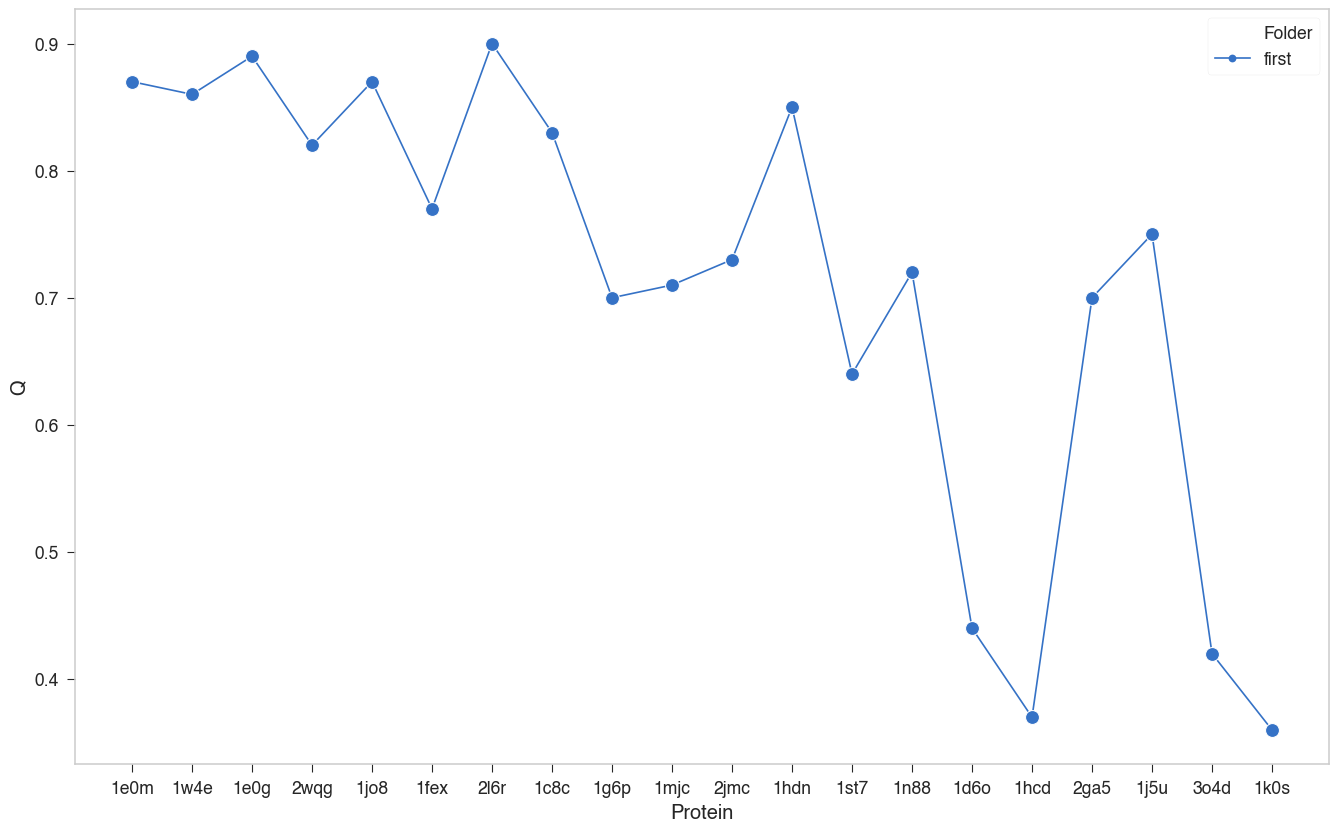

In [21]:
y = "Q"
# d = data.query("Steps > 1500").reset_index(drop=True)
d = data
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
# sub_data = max_Q_data.query("Scheme in ['hybrid contact', 'contact as in water', 'contact as in membrane']")
# sub_data = max_Q_mem_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


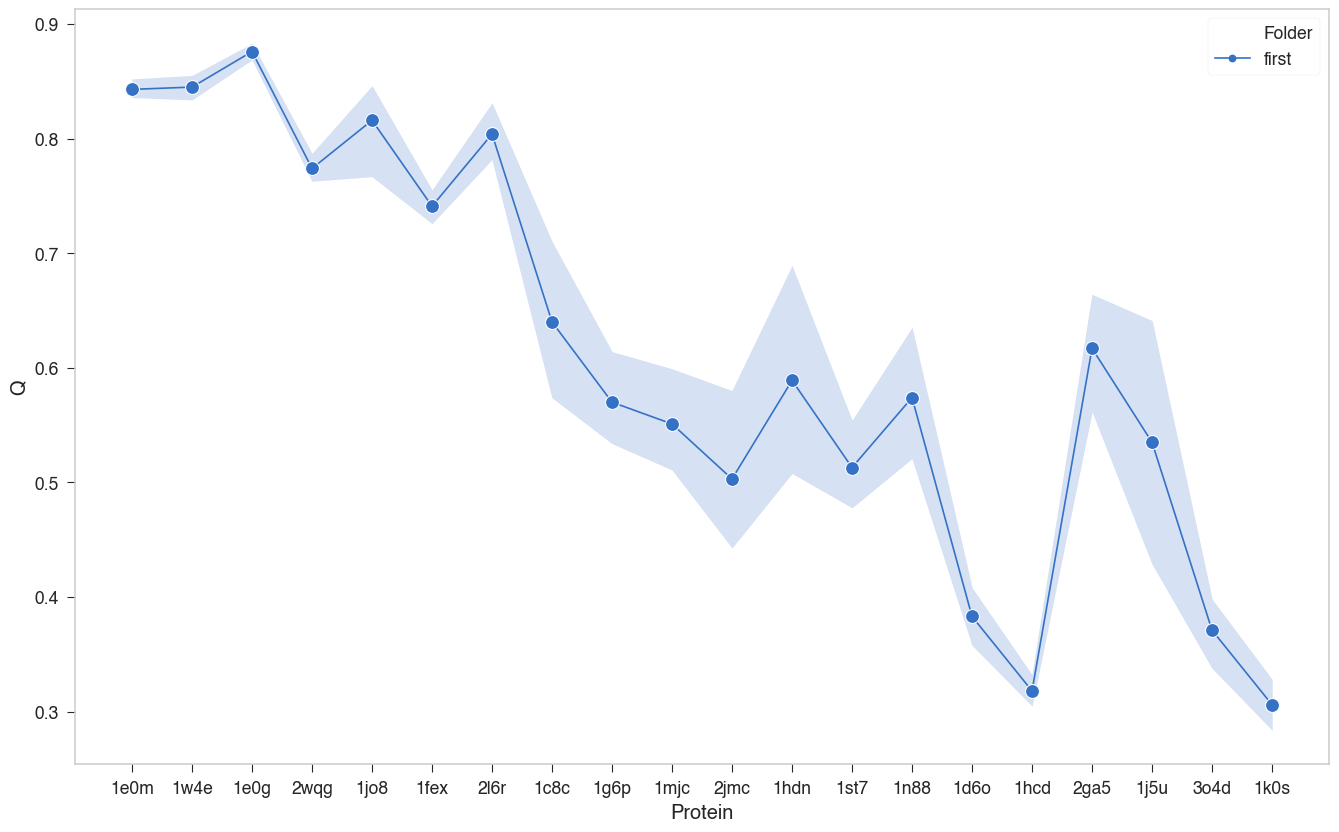

In [27]:
y = "Q"
# d = data.query("Steps > 1500").reset_index(drop=True)
d = data
t = d.groupby(["Protein", "Folder", "Run"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
# sub_data = max_Q_data.query("Scheme in ['hybrid contact', 'contact as in water', 'contact as in membrane']")
# sub_data = max_Q_mem_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


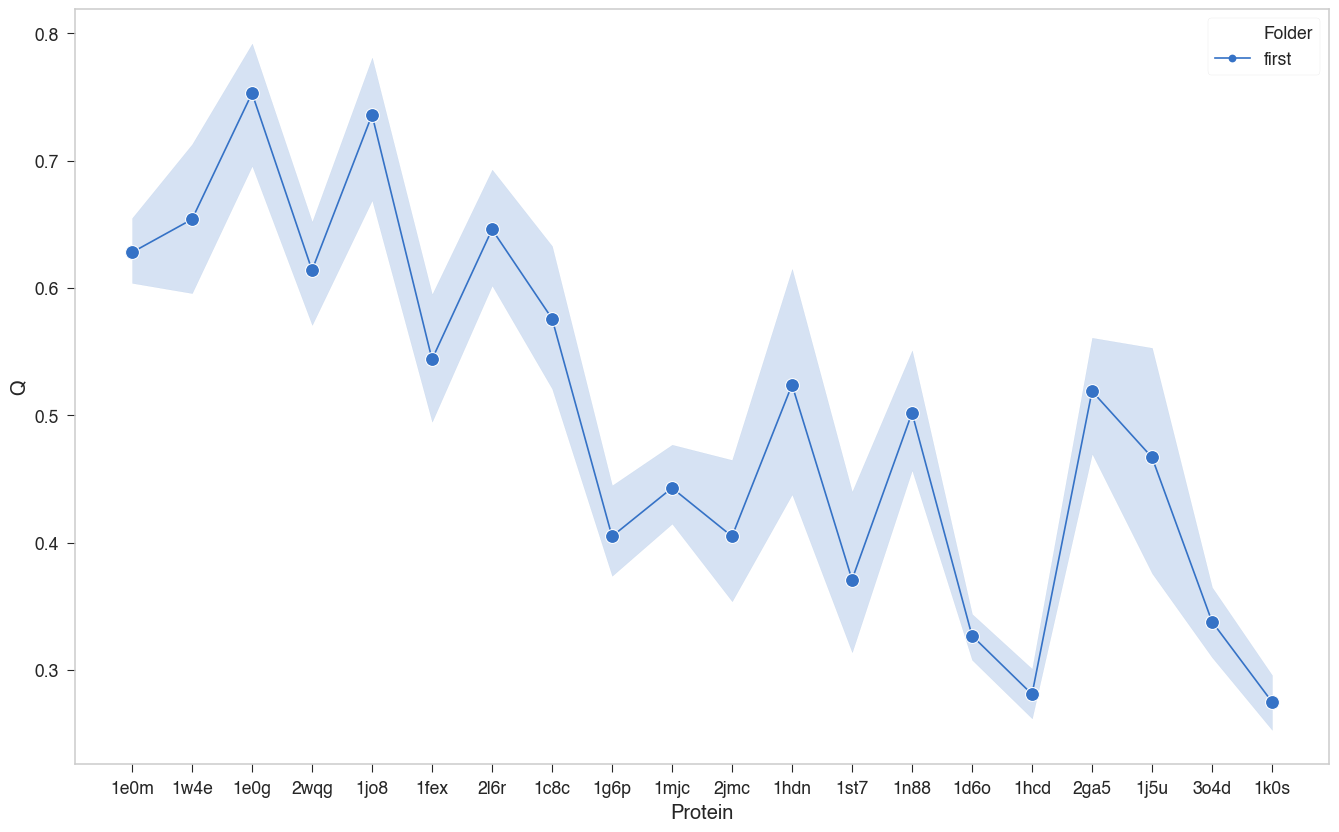

In [28]:
y = "Q"
# d = data.query("Steps > 1500").reset_index(drop=True)
d = data
t = d.groupby(["Protein", "Folder", "Run"])["Steps"].idxmax().reset_index()
max_Q_data = d.iloc[t["Steps"].to_list()].reset_index(drop=True)
sub_data = max_Q_data
# sub_data = max_Q_data.query("Scheme in ['hybrid contact', 'contact as in water', 'contact as in membrane']")
# sub_data = max_Q_mem_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')


In [16]:
data

,Steps,Q,Rg,Backbone,Rama,Contact,Fragment,Membrane,ER,TBM_Q,Beta,Pap,Helical,Total,Run,Protein,Folder
0,0,0.05,36.04,68.02,-111.94,-21.21,-13.23,0.0,0.0,0.0,-0.00,0.00,0.0,-78.36,0,1e0m,first
1,1,0.10,33.51,1.35,-118.56,-33.90,-21.35,0.0,0.0,0.0,-0.00,0.00,0.0,-172.46,0,1e0m,first
2,2,0.20,22.52,193.61,-61.70,-28.71,-37.44,0.0,0.0,0.0,-0.00,0.00,0.0,65.76,0,1e0m,first
3,3,0.15,20.12,214.98,-83.38,-29.58,-30.61,0.0,0.0,0.0,-0.00,0.00,0.0,71.41,0,1e0m,first
4,4,0.26,17.40,202.66,-80.84,-29.53,-42.52,0.0,0.0,0.0,-9.62,0.00,0.0,40.15,0,1e0m,first
5,5,0.32,17.36,237.12,-81.77,-30.40,-43.85,0.0,0.0,0.0,-4.70,-0.01,0.0,76.38,0,1e0m,first
6,6,0.35,13.83,193.53,-75.48,-29.74,-48.77,0.0,0.0,0.0,-11.08,-3.34,0.0,25.11,0,1e0m,first
7,7,0.31,11.38,209.04,-75.46,-30.34,-39.83,0.0,0.0,0.0,-11.80,-2.85,0.0,48.77,0,1e0m,first
8,8,0.28,14.80,201.89,-66.88,-31.54,-42.82,0.0,0.0,0.0,-20.81,-8.83,0.0,31.01,0,1e0m,first
9,9,0.30,18.44,213.88,-63.19,-30.29,-48.24,0.0,0.0,0.0,-7.52,-0.00,0.0,64.64,0,1e0m,first


In [30]:
parser = PDBParser()

In [35]:
movie_dcd = "/Users/weilu/Research/server/dec_2019/iterative_optimization/first/2wqg/4/movie.dcd"

In [36]:
s = parser.get_structure("X", movie_dcd)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 20: invalid start byte

In [31]:
movie = "/Users/weilu/Research/server/dec_2019/iterative_optimization/first/2wqg/4/movie.pdb"

In [37]:
movie = "/Users/weilu/Research/server/dec_2019/iterative_optimization/first/2wqg/0/movie.pdb"

In [38]:
s = parser.get_structure("X", movie)

In [45]:

complete_models = []
for i in range(10):
    movie = f"/Users/weilu/Research/server/dec_2019/iterative_optimization/first/2wqg/{i}/movie.pdb"
    s = parser.get_structure("X", movie)
    complete_models += list(s.get_models())

In [65]:
t = data.query("Protein == '2wqg' and Steps > 1").reset_index(drop=True)
t = t.rename(columns={"Q":"Qw"})

In [49]:
len(complete_models)

3409

In [73]:
print(pdb_list)

['1e0m', '1w4e', '1e0g', '2wqg', '1jo8', '1fex', '2l6r', '1c8c', '1g6p', '1mjc', '2jmc', '1hdn', '1st7', '1n88', '1d6o', '1hcd', '2ga5', '1j5u', '3o4d', '1k0s']


In [ ]:
folder_list = ["first"]
folder = "first"
pre = f"/scratch/wl45/dec_2019/iterative_optimization/{folder}"
to_folder = "."
os.system(f"mkdir -p {to_folder}/decoys/openMM")
complete_models = []
for pdb in pdb_list:
    for i in range(10):
        movie = f"{pre}/{pdb}/{i}/movie.pdb"
        s = parser.get_structure("X", movie)
        complete_models += list(s.get_models())
    t = data.query(f"Protein == '{pdb}' and Steps > 1").reset_index(drop=True)
    t["structure"] = complete_models
    t = t.rename(columns={"Q":"Qw"})
    last50 = t.groupby("Run").tail(50).reset_index(drop=True)
    to_folder = "."
    last50.to_pickle(f"{to_folder}/decoys/openMM/{folder}_{pdb}")

In [75]:
folder_list = ["first"]
folder = "first"
pdb = "1w4e"
pre = f"/Users/weilu/Research/server/dec_2019/iterative_optimization/{folder}"
complete_models = []
for i in range(10):
    movie = f"{pre}/{pdb}/{i}/movie.pdb"
    s = parser.get_structure("X", movie)
    complete_models += list(s.get_models())
t = data.query(f"Protein == '{pdb}' and Steps > 1").reset_index(drop=True)
t["structure"] = complete_models
t = t.rename(columns={"Q":"Qw"})

In [76]:
len(t)

3756

In [77]:
len(complete_models)

3756

In [112]:
t = pd.read_pickle("/Users/weilu/Research/server/dec_2019/multiDensityOptimization/optimization_iteration1/optimization/decoys/openMM/1c8c_first.pkl")

In [113]:
structures = t["structure"].to_list()

In [89]:
print(structures[0])

<Model id=172>


In [114]:
all_res = list(structures[0].get_residues())

In [115]:
all_res[0]

<Residue MET het=  resseq=1 icode= >

In [116]:
is_hetero(all_res[0])

False

In [ ]:
all_res

In [96]:
all_res[0].id[0]

'H_NGP'

In [70]:
last50 = t.groupby("Run").tail(50).reset_index(drop=True)

In [ ]:
to_folder = "."
last50.to_pickle(f"{to_folder}/decoys/openMM/{folder}_{pdb}")

In [55]:
t["structure"] = complete_models

In [ ]:
sampled["structure"] = sampled.apply(getStructures, all_movies=all_movies, axis=1)

In [ ]:
import io
from Bio.PDB.PDBParser import PDBParser
simulation_location, name = args.label.split("__")
simulation_location_name = f"{simulation_location}_{name}"

def getStructures(x, all_movies):
    index = int(x["index"])+1
    run = int(x["Run"])

    start = index * size
    end = (index + 1) * size
    f = io.StringIO("".join(all_movies[run][start:end]))
    parser = PDBParser()
    return parser.get_structure(f"{index}", f)

a = pd.read_csv(f"{database_location}/Q_{simulation_location_name}", index_col=0).query(f"Rank < {decoy_n*3}")
sampled = a.sample(decoy_n)
all_movies = {}
for i in sampled["Run"].unique():
    with open(f"{database_location}/{simulation_location_name}_{i}/movie.pdb") as f:
        movie = f.readlines()
    all_movies[i] = movie
size = 0
for line in movie:
    size += 1
    if line == "ENDMDL\n":
        break
print(simulation_location_name, size)
sampled["structure"] = sampled.apply(getStructures, all_movies=all_movies, axis=1)
sampled["Qw"] = sampled[" Qw"].round(3)
sampled.drop(" Qw", axis=1)
sampled.to_pickle(f"decoys/lammps/{name}_{simulation_location}.pkl")

In [ ]:
a